In [22]:
import os
import gc
import matplotlib.pyplot as plt
import matplotlib.colors as mat_color
import numpy as np
from PIL import Image
import random
import cv2

In [23]:
train_path = './data/Covid-19 Image Dataset/train'
test_path = './data/Covid-19 Image Dataset/test'
base_path = './data'
base_folder = "Covid-19 Image Dataset"
target_folder = 'Coivd-19_Hist'
no_norm = mat_color.Normalize(vmin=0, vmax=255, clip=False)

In [24]:
labels = os.listdir(train_path)
print(labels)
no_norm = mat_color.Normalize(vmin=0, vmax=255, clip=False)

['Covid', 'Normal', 'Viral Pneumonia']


In [25]:
def load_random_imgs_from_folder(folder, label):
    plt.figure(figsize=(15, 15))
    for i in range(3):
        file = random.choice(os.listdir(folder))
        image_path = os.path.join(folder, file)
        img_bgr = cv2.imread(image_path)
        img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        ax = plt.subplot(1, 3, i+1)
        ax.title.set_text(label)
        plt.xlabel(f'Name: {file} , "Size: {img.shape}"')
        plt.imshow(img, norm=no_norm)

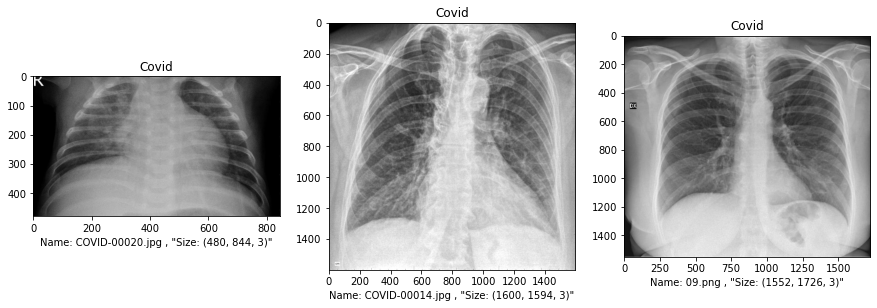

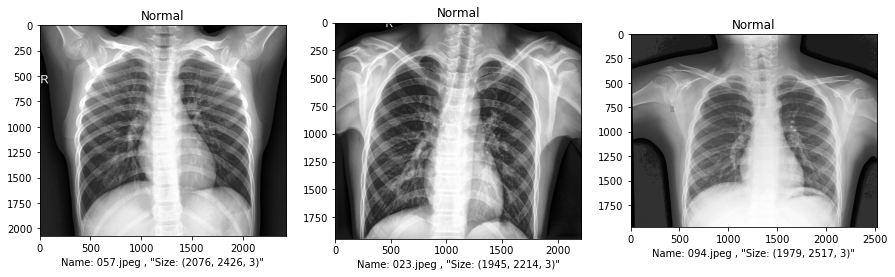

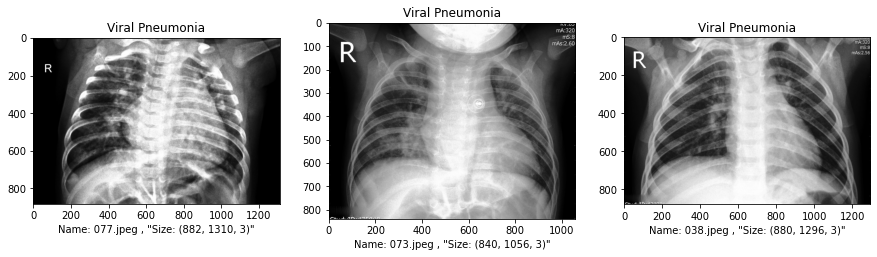

In [27]:
for label in labels:
    load_random_imgs_from_folder(f"{train_path}/{label}",label)

In [6]:
for func in [lambda: os.mkdir(os.path.join(base_path, target_folder)),
             lambda: os.mkdir(os.path.join(os.path.join(base_path, target_folder), 'train')),
             lambda: os.mkdir(os.path.join(os.path.join(base_path, target_folder), 'test'))
            ]:
    try:
        func()
    except Exception as error:
        print(error)
        continue

[WinError 183] 当文件已存在时，无法创建该文件。: './data\\Coivd-19_Hist'
[WinError 183] 当文件已存在时，无法创建该文件。: './data\\Coivd-19_Hist\\train'
[WinError 183] 当文件已存在时，无法创建该文件。: './data\\Coivd-19_Hist\\test'


In [7]:
def func_2():
    for label in labels:
        os.mkdir(os.path.join(os.path.join(os.path.join(base_path, target_folder), 'test'), label))
        os.mkdir(os.path.join(os.path.join(os.path.join(base_path, target_folder), 'train'), label))
try:
    func_2()
except Exception as error:
    print(error)

[WinError 183] 当文件已存在时，无法创建该文件。: './data\\Coivd-19_Hist\\test\\Covid'


In [8]:
img_size = 128

In [9]:
def generate_hist_equal_unit(image_path, image_name):
    img_hist = cv2.imread(image_path, flags=0)
    img_hist = cv2.resize(img_hist, (img_size, img_size), interpolation=cv2.INTER_LINEAR)
    img_equa = cv2.equalizeHist(img_hist)
    if image_name is not None:
        cv2.imwrite(image_name, img_equa)
    else:
        return img_hist, img_equa

In [10]:
def show_image(image):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, 'gray', norm=no_norm)
    plt.subplot(1, 2, 2)
    n, bins, patches = plt.hist(image.ravel(), bins=256, color='green', alpha=0.7)

In [17]:
def show_hist_cdf(img):
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    plt.figure(figsize=(14, 12))
    plt.subplot(2, 2, 1)
    plt.imshow(img, 'gray', norm=no_norm)
    plt.subplot(2, 2, 2)
    plt.plot(cdf_normalized, color = 'b', linewidth=1.5)
    plt.hist(img.flatten(), 256, [0, 256], color='r', alpha=0.7)
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.show()

In [12]:
random_label = random.choice(os.listdir(train_path))
img_hist, img_equa = generate_hist_equal_unit(train_path + "/" + random_label + "/" + random.choice(os.listdir(train_path + "/" + random_label)), None)

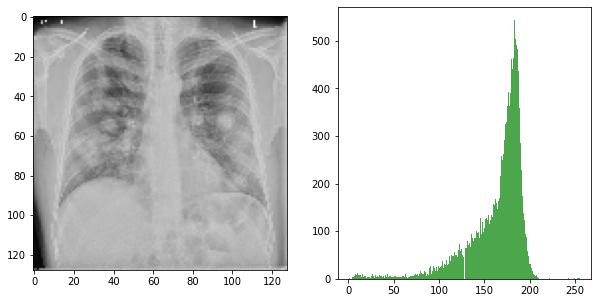

In [13]:
show_image(img_hist)

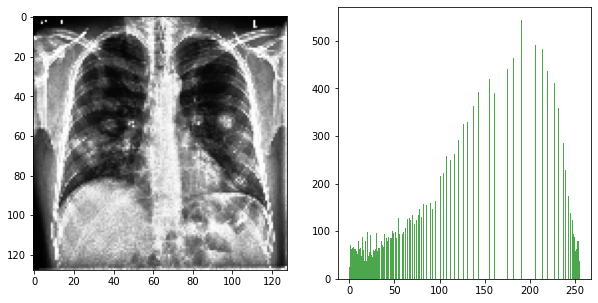

In [14]:
show_image(img_equa)

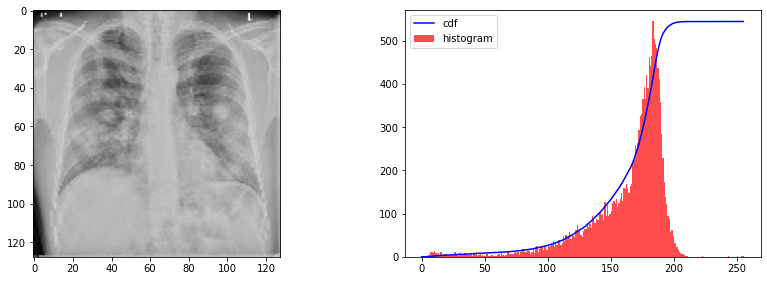

In [20]:
show_hist_cdf(img_hist)

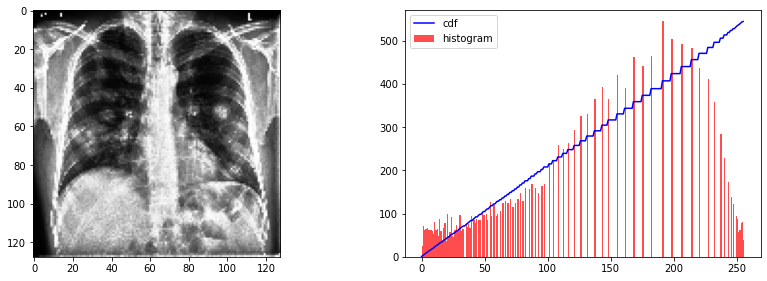

In [21]:
show_hist_cdf(img_equa)

In [17]:
def generate_hist_equal(train_path, test_path):
    count = 0
    for path in [train_path, test_path]:
        for label in labels:
            label_path = os.path.join(path, label)
            image_name_list = os.listdir(label_path)
            for image_name in image_name_list:
                image_path = os.path.join(label_path, image_name)
                if image_path[-2] == 'e':
                    image_name=image_path.replace(base_folder, target_folder)[:-5]
                elif  image_path[-2] == 'n' or image_path[-2] == 'p':
                    image_name=image_path.replace(base_folder, target_folder)[:-4]
                else:
                    print("!!!", image_path)
                    return None
                print(image_path, " | ", image_name + ".jpg", " | ", "count ->", count)
                generate_hist_equal_unit(image_path=image_path, image_name=image_name + ".jpg")
                count += 1

In [18]:
generate_hist_equal(train_path, test_path)

./data/Covid-19 Image Dataset/train\Covid\01.jpeg  |  ./data/Coivd-19_Hist/train\Covid\01.jpg  |  count -> 0
./data/Covid-19 Image Dataset/train\Covid\010.png  |  ./data/Coivd-19_Hist/train\Covid\010.jpg  |  count -> 1
./data/Covid-19 Image Dataset/train\Covid\012.jpeg  |  ./data/Coivd-19_Hist/train\Covid\012.jpg  |  count -> 2
./data/Covid-19 Image Dataset/train\Covid\015.jpg  |  ./data/Coivd-19_Hist/train\Covid\015.jpg  |  count -> 3
./data/Covid-19 Image Dataset/train\Covid\019.png  |  ./data/Coivd-19_Hist/train\Covid\019.jpg  |  count -> 4
./data/Covid-19 Image Dataset/train\Covid\02.jpeg  |  ./data/Coivd-19_Hist/train\Covid\02.jpg  |  count -> 5
./data/Covid-19 Image Dataset/train\Covid\020.jpg  |  ./data/Coivd-19_Hist/train\Covid\020.jpg  |  count -> 6
./data/Covid-19 Image Dataset/train\Covid\021.jpeg  |  ./data/Coivd-19_Hist/train\Covid\021.jpg  |  count -> 7
./data/Covid-19 Image Dataset/train\Covid\022.jpeg  |  ./data/Coivd-19_Hist/train\Covid\022.jpg  |  count -> 8
./data/Co

./data/Covid-19 Image Dataset/train\Covid\COVID-00006.jpg  |  ./data/Coivd-19_Hist/train\Covid\COVID-00006.jpg  |  count -> 76
./data/Covid-19 Image Dataset/train\Covid\COVID-00007.jpg  |  ./data/Coivd-19_Hist/train\Covid\COVID-00007.jpg  |  count -> 77
./data/Covid-19 Image Dataset/train\Covid\COVID-00008.jpg  |  ./data/Coivd-19_Hist/train\Covid\COVID-00008.jpg  |  count -> 78
./data/Covid-19 Image Dataset/train\Covid\COVID-00009.jpg  |  ./data/Coivd-19_Hist/train\Covid\COVID-00009.jpg  |  count -> 79
./data/Covid-19 Image Dataset/train\Covid\COVID-00010.jpg  |  ./data/Coivd-19_Hist/train\Covid\COVID-00010.jpg  |  count -> 80
./data/Covid-19 Image Dataset/train\Covid\COVID-00011.jpg  |  ./data/Coivd-19_Hist/train\Covid\COVID-00011.jpg  |  count -> 81
./data/Covid-19 Image Dataset/train\Covid\COVID-00012.jpg  |  ./data/Coivd-19_Hist/train\Covid\COVID-00012.jpg  |  count -> 82
./data/Covid-19 Image Dataset/train\Covid\COVID-00013a.jpg  |  ./data/Coivd-19_Hist/train\Covid\COVID-00013a.jp

./data/Covid-19 Image Dataset/train\Normal\073.jpeg  |  ./data/Coivd-19_Hist/train\Normal\073.jpg  |  count -> 157
./data/Covid-19 Image Dataset/train\Normal\074.jpeg  |  ./data/Coivd-19_Hist/train\Normal\074.jpg  |  count -> 158
./data/Covid-19 Image Dataset/train\Normal\075.jpeg  |  ./data/Coivd-19_Hist/train\Normal\075.jpg  |  count -> 159
./data/Covid-19 Image Dataset/train\Normal\076.jpeg  |  ./data/Coivd-19_Hist/train\Normal\076.jpg  |  count -> 160
./data/Covid-19 Image Dataset/train\Normal\077.jpeg  |  ./data/Coivd-19_Hist/train\Normal\077.jpg  |  count -> 161
./data/Covid-19 Image Dataset/train\Normal\079.jpeg  |  ./data/Coivd-19_Hist/train\Normal\079.jpg  |  count -> 162
./data/Covid-19 Image Dataset/train\Normal\08.jpeg  |  ./data/Coivd-19_Hist/train\Normal\08.jpg  |  count -> 163
./data/Covid-19 Image Dataset/train\Normal\080.jpeg  |  ./data/Coivd-19_Hist/train\Normal\080.jpg  |  count -> 164
./data/Covid-19 Image Dataset/train\Normal\081.jpeg  |  ./data/Coivd-19_Hist/train

./data/Covid-19 Image Dataset/train\Viral Pneumonia\082.jpeg  |  ./data/Coivd-19_Hist/train\Viral Pneumonia\082.jpg  |  count -> 244
./data/Covid-19 Image Dataset/train\Viral Pneumonia\083.jpeg  |  ./data/Coivd-19_Hist/train\Viral Pneumonia\083.jpg  |  count -> 245
./data/Covid-19 Image Dataset/train\Viral Pneumonia\084.jpeg  |  ./data/Coivd-19_Hist/train\Viral Pneumonia\084.jpg  |  count -> 246
./data/Covid-19 Image Dataset/train\Viral Pneumonia\09.jpeg  |  ./data/Coivd-19_Hist/train\Viral Pneumonia\09.jpg  |  count -> 247
./data/Covid-19 Image Dataset/train\Viral Pneumonia\094.jpeg  |  ./data/Coivd-19_Hist/train\Viral Pneumonia\094.jpg  |  count -> 248
./data/Covid-19 Image Dataset/train\Viral Pneumonia\095.jpeg  |  ./data/Coivd-19_Hist/train\Viral Pneumonia\095.jpg  |  count -> 249
./data/Covid-19 Image Dataset/train\Viral Pneumonia\096.jpeg  |  ./data/Coivd-19_Hist/train\Viral Pneumonia\096.jpg  |  count -> 250
./data/Covid-19 Image Dataset/test\Covid\0100.jpeg  |  ./data/Coivd-19_

./data/Covid-19 Image Dataset/test\Viral Pneumonia\0114.jpeg  |  ./data/Coivd-19_Hist/test\Viral Pneumonia\0114.jpg  |  count -> 310
./data/Covid-19 Image Dataset/test\Viral Pneumonia\0115.jpeg  |  ./data/Coivd-19_Hist/test\Viral Pneumonia\0115.jpg  |  count -> 311
./data/Covid-19 Image Dataset/test\Viral Pneumonia\0116.jpeg  |  ./data/Coivd-19_Hist/test\Viral Pneumonia\0116.jpg  |  count -> 312
./data/Covid-19 Image Dataset/test\Viral Pneumonia\0117.jpeg  |  ./data/Coivd-19_Hist/test\Viral Pneumonia\0117.jpg  |  count -> 313
./data/Covid-19 Image Dataset/test\Viral Pneumonia\0118.jpeg  |  ./data/Coivd-19_Hist/test\Viral Pneumonia\0118.jpg  |  count -> 314
./data/Covid-19 Image Dataset/test\Viral Pneumonia\0119.jpeg  |  ./data/Coivd-19_Hist/test\Viral Pneumonia\0119.jpg  |  count -> 315
./data/Covid-19 Image Dataset/test\Viral Pneumonia\0120.jpeg  |  ./data/Coivd-19_Hist/test\Viral Pneumonia\0120.jpg  |  count -> 316
